In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Task 1. Algorithm's analysis

In [4]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

### Generating graph

In [3]:

# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

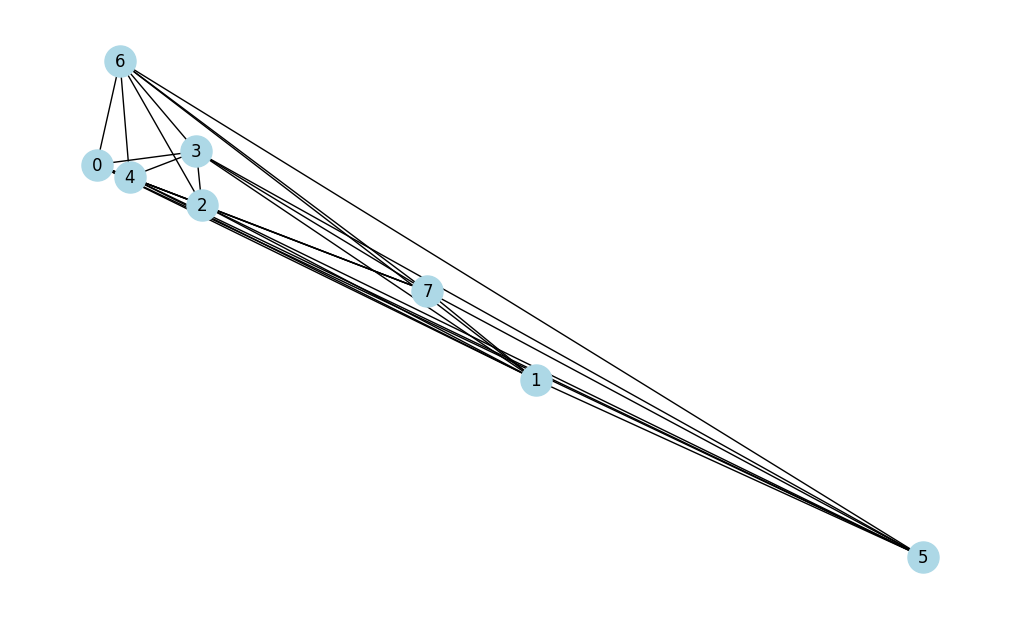

In [4]:
G = gnp_random_connected_graph(8, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [12]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

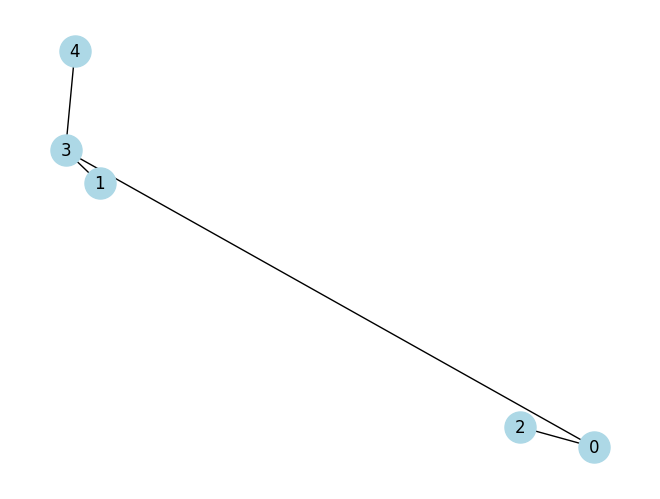

In [13]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 5), (0, 7), (1, 6), (2, 5), (3, 5), (4, 5), (5, 6)]), 7)

#### Your implementation

(EdgeView([(0, 3), (0, 2), (3, 4), (3, 1)]), 4)

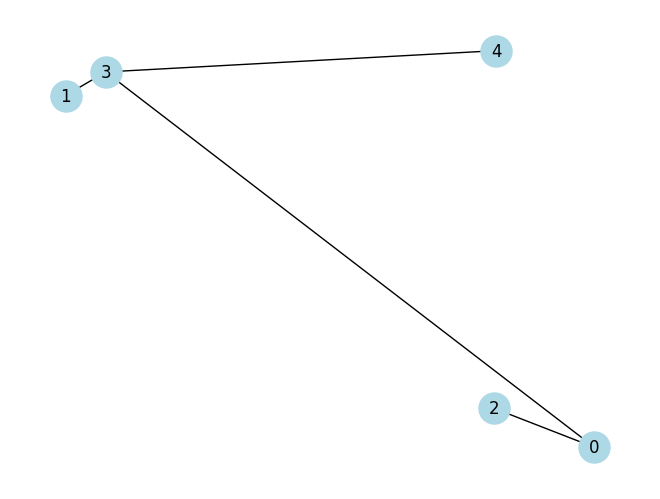

In [10]:
import heapq
class DSU:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_of_i = self.find(i)
        root_of_j = self.find(j)
        if root_of_i != root_of_j:
            self.parent[root_of_i] = root_of_j
            return True
        return False

def kruskals(graph):
    n = len(graph.nodes())
    dsu = DSU(n)
    edges_new = []
    edges_heap = []

    for u, v, data in graph.edges(data=True):
        heapq.heappush(edges_heap, (data['weight'], u, v))
    while len(edges_new) < n - 1:
        weight, u, v = heapq.heappop(edges_heap)
        if dsu.union(u, v):
            edges_new.append((u, v, weight))

    our_graph = nx.Graph()
    our_graph.add_weighted_edges_from(edges_new)
    return our_graph

our_G = kruskals(G)
nx.draw(our_G, node_color='lightblue',
        with_labels=True,
        node_size=500)
our_G.edges(), len(our_G.edges())


100%|██████████| 500/500 [00:37<00:00, 13.20it/s]


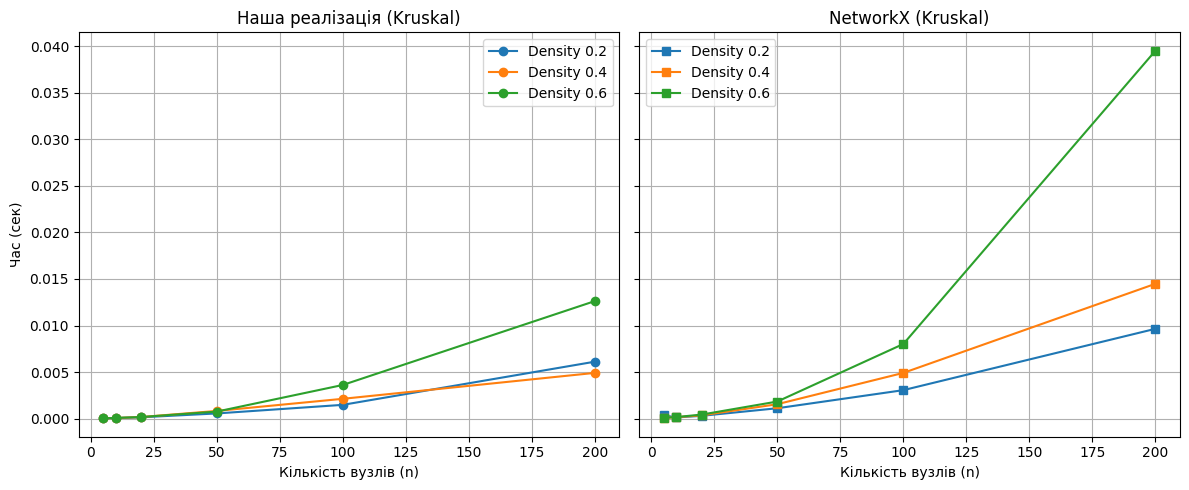

Вузли (n)  | Щільність  | Наш час (с)  | NX час (с)  | Різниця
--------------------------------------------------
200        | 0.2        | 0.006119     | 0.009650    | 0.63x
200        | 0.4        | 0.004916     | 0.014483    | 0.34x
200        | 0.6        | 0.012627     | 0.039516    | 0.32x


In [ ]:
import time
from tqdm import tqdm
sizes = [5, 10, 20, 50, 100, 200]
densities = [0.2, 0.4, 0.6]
NUM_ITERATIONS = 500
results = []

for n in sizes:
    for density in densities:
        our_times = []
        for _ in tqdm(range(NUM_ITERATIONS)):
            G = gnp_random_connected_graph(n, density)
            start = time.time()
            _ = kruskals(G)
            end = time.time()
            our_times.append(end-start)
        our_avg = np.min(our_times)

        nx_times = []
        for _ in tqdm(range(NUM_ITERATIONS)):
            G = gnp_random_connected_graph(n, density)
            start = time.time()
            _ = nx.minimum_spanning_tree(G, algorithm="kruskal")
            end = time.time()
            nx_times.append(end-start)
        nx_avg = np.min(nx_times)

        results.append({
            'nodes': n,
            'density': density,
            'our_mean': np.mean(our_times),
            'nx_mean': np.mean(nx_times)
        })

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for d in densities:
    subset = [r for r in results if r['density'] == d]
    x = [r['nodes'] for r in subset]
    y = [r['our_mean'] for r in subset]
    ax1.plot(x, y, marker='o', label=f'Density {d}')

ax1.set_title('Наша реалізація (Kruskal)')
ax1.set_xlabel('Кількість вершин (n)')
ax1.set_ylabel('Час (сек)')
ax1.legend()
ax1.grid(True)

for d in densities:
    subset = [r for r in results if r['density'] == d]
    x = [r['nodes'] for r in subset]
    y = [r['nx_mean'] for r in subset]
    ax2.plot(x, y, marker='s', label=f'Density {d}')

ax2.set_title('NetworkX (Kruskal)')
ax2.set_xlabel('Кількість вершин (n)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

print(f"{'Вузли (n)':<10} | {'Щільність':<10} | {'Наш час (с)':<12} | {'NX час (с)':<11} | {'Різниця'}")
print("-" * 50)

max_n = max(sizes)
for r in results:
    if r['nodes'] == max_n:
        y_m = r['our_mean']
        n_m = r['nx_mean']
        dens = r['density']
        ratio = y_m / n_m if n_m > 0 else 0

        print(f"{max_n:<10} | {dens:<10} | {y_m:<12.6f} | {n_m:<11.6f} | {ratio:.2f}x")

print("="*62)


Короткий висновок по Крускала:

Час зростає зі збільшенням кількості вершин і щільності графа.
Залежність відповідає теоретичній складності O(ElogE).
Наша реалізація швидша за NetworkX для всіх параметрів.
Найбільший виграш — на щільних графах.

Причина: мінімалістична реалізація без зайвих абстракцій і ефективний DSU.

✅ Де наш алгоритм працює найкраще?

При середніх і великих n

При вищій щільності графа

❌ Де працює найгірше?

При дуже малих n різниця майже непомітна

При дуже розріджених графах виграш менший

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Prim's algorithm

#### nx implementation

In [ ]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

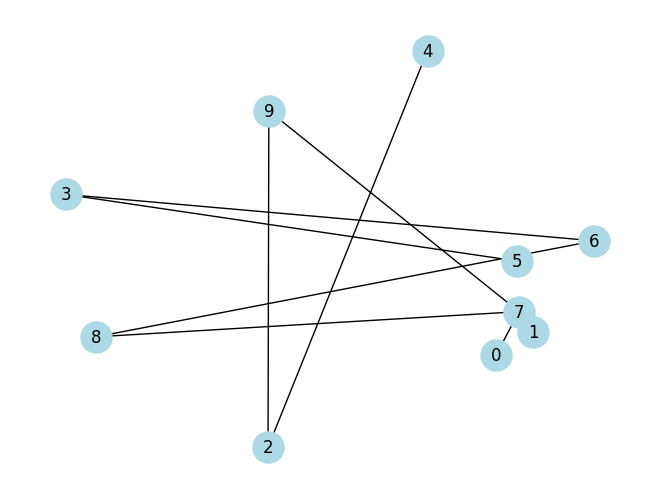

In [ ]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstp.edges(), len(mstp.edges())


(EdgeView([(0, 7), (1, 7), (2, 9), (2, 4), (3, 6), (3, 5), (6, 8), (7, 8), (7, 9)]),
 9)

#### Your implementation

(EdgeView([(0, 1), (0, 2), (2, 3), (3, 4)]), 4)

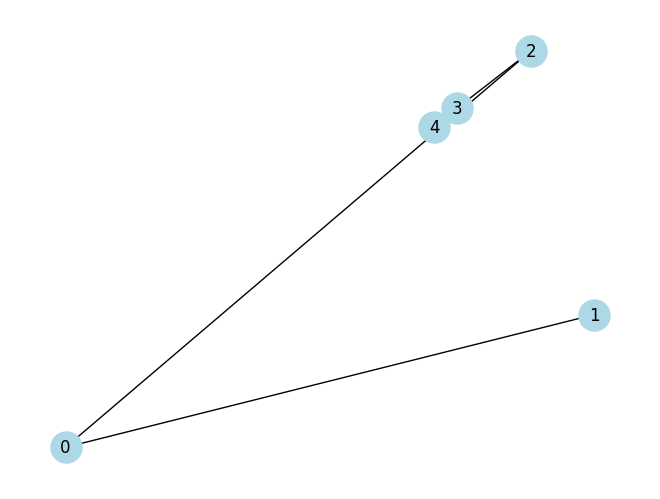

In [21]:

def min_edge(graph, visited):
    min_weight = 99999
    edge = None
    for u in visited:
        for v, data in graph[u].items():
            if v not in visited:
                w = data['weight']
                if w < min_weight:
                    min_weight = w
                    edge = (u, v, w)
    return edge

def prims(graph):
    n = len(graph.nodes())
    visited = set([0])
    edges_new = []

    while len(edges_new) < n - 1:
        best_edge = min_edge(graph, visited)
        u, v, w = best_edge
        edges_new.append((u, v, w))
        visited.add(v)

    our_graph = nx.Graph()
    our_graph.add_weighted_edges_from(edges_new)
    return our_graph

our_G = prims(G)
nx.draw(our_G, node_color='lightblue',
        with_labels=True,
        node_size=500)
our_G.edges(), len(our_G.edges())


100%|██████████| 200/200 [00:02<00:00, 77.21it/s]


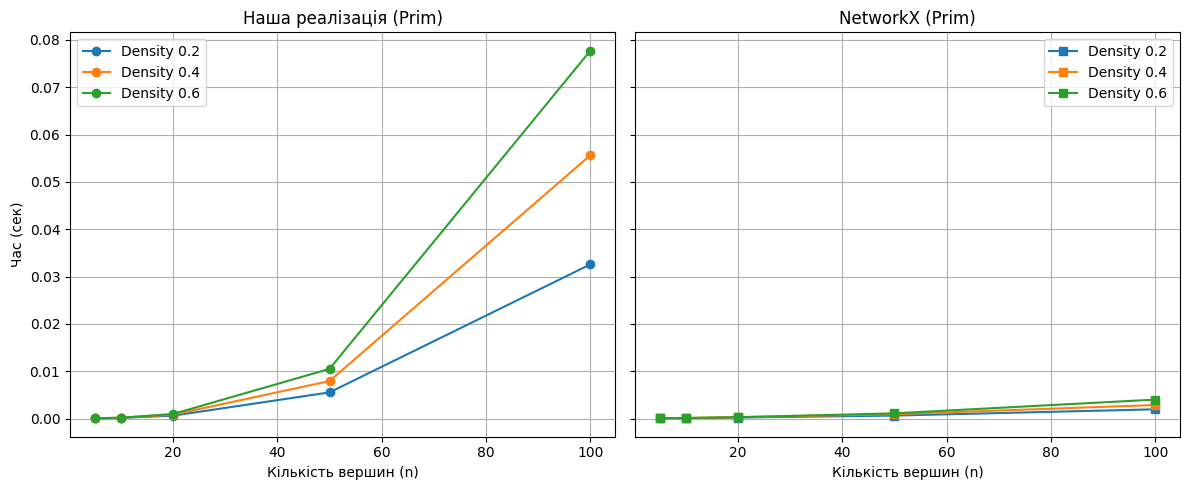

Вузли (n)  | Щільність  | Наш час (с)  | NX час (с)  | Різниця
--------------------------------------------------
100        | 0.2        | 0.032564     | 0.001952    | 16.68x
100        | 0.4        | 0.055620     | 0.002857    | 19.47x
100        | 0.6        | 0.077716     | 0.004004    | 19.41x


In [22]:
import time
from tqdm import tqdm
sizes = [5, 10, 20, 50, 100]
densities = [0.2, 0.4, 0.6]
NUM_ITERATIONS = 200
results = []

for n in sizes:
    for density in densities:
        our_times = []
        for _ in tqdm(range(NUM_ITERATIONS)):
            G = gnp_random_connected_graph(n, density)
            start = time.time()
            _ = prims(G)
            end = time.time()
            our_times.append(end-start)
        our_avg = np.min(our_times)

        nx_times = []
        for _ in tqdm(range(NUM_ITERATIONS)):
            G = gnp_random_connected_graph(n, density)
            start = time.time()
            _ = nx.minimum_spanning_tree(G, algorithm="prim")
            end = time.time()
            nx_times.append(end-start)
        nx_avg = np.min(nx_times)

        results.append({
            'nodes': n,
            'density': density,
            'our_mean': np.mean(our_times),
            'nx_mean': np.mean(nx_times)
        })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


for d in densities:
    subset = [r for r in results if r['density'] == d]
    x = [r['nodes'] for r in subset]
    y = [r['our_mean'] for r in subset]
    ax1.plot(x, y, marker='o', label=f'Density {d}')

ax1.set_title('Наша реалізація (Prim)')
ax1.set_xlabel('Кількість вершин (n)')
ax1.set_ylabel('Час (сек)')
ax1.legend()
ax1.grid(True)

for d in densities:
    subset = [r for r in results if r['density'] == d]
    x = [r['nodes'] for r in subset]
    y = [r['nx_mean'] for r in subset]
    ax2.plot(x, y, marker='s', label=f'Density {d}')

ax2.set_title('NetworkX (Prim)')
ax2.set_xlabel('Кількість вершин (n)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

print(f"{'Вузли (n)':<10} | {'Щільність':<10} | {'Наш час (с)':<12} | {'NX час (с)':<11} | {'Різниця'}")
print("-" * 50)

max_n = max(sizes)
for r in results:
    if r['nodes'] == max_n:
        y_m = r['our_mean']
        n_m = r['nx_mean']
        dens = r['density']
        ratio = y_m / n_m if n_m > 0 else 0

        print(f"{max_n:<10} | {dens:<10} | {y_m:<12.6f} | {n_m:<11.6f} | {ratio:.2f}x")

print("="*62)


Короткий висновок по Приму:

Для всіх щільностей:
Час виконання різко зростає зі збільшенням n

При збільшенні щільності: 0.2 → 0.4 → 0.6 час зростає дуже суттєво

Зростання значно швидше, ніж у NetworkX(особливо помітно після n = 50)

Чому? Бо ми перебираємо всі вершини з visited і для кожної перебираємо ще всіх сусідів, кожного разу шукаючи мінімальне ребро повним перебором.
Фактична складність: 𝑂(𝑉**2) або 𝑂(𝑉𝐸)

Загальний висновок🆘🆘🆘

У ході експериментів встановлено, що ефективність алгоритму суттєво залежить від реалізації.

Наша реалізація Крускала працює найкраще — вона швидша за NetworkX для всіх досліджених параметрів, особливо на щільних графах. Це пояснюється використанням heap та простої структури DSU без зайвих абстракцій.

Наша реалізація Прима працює найгірше — вона у 16–19 разів повільніша за NetworkX, особливо при великих n і високій щільності. Причина — пошук мінімального ребра повним перебором без використання пріоритетної черги, що призводить до квадратичної складності.

Отже, серед реалізованих алгоритмів найшвидшим виявився Крускал, а найменш ефективним — власна реалізація Прима, що зумовлено різницею в алгоритмічній оптимізації.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

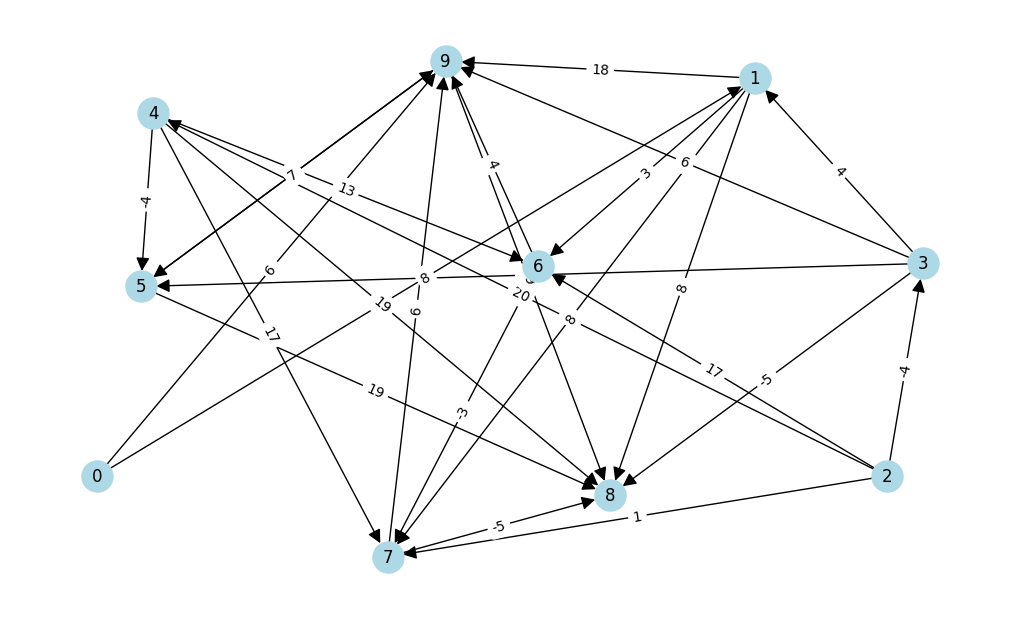

In [ ]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 1: 8
Distance to 9: 6
Distance to 6: 11
Distance to 7: 8
Distance to 8: 3
Distance to 5: 13


#### Your implementation

In [ ]:
# code here

### Floyd-Warshall algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 1: 8, 9: 6, 2: inf, 3: inf, 4: inf, 5: 13, 6: 11, 7: 8, 8: 3}
Distances with 1 source: {1: 0, 6: 3, 7: 0, 8: -5, 9: 6, 0: inf, 2: inf, 3: inf, 4: inf, 5: 13}
Distances with 2 source: {2: 0, 3: -4, 4: 20, 6: 3, 7: 0, 0: inf, 1: 0, 5: 8, 8: -9, 9: 2}
Distances with 3 source: {3: 0, 1: 4, 9: 6, 5: 12, 8: -5, 0: inf, 2: inf, 4: inf, 6: 7, 7: 4}
Distances with 4 source: {4: 0, 5: -4, 6: 13, 7: 10, 8: 5, 0: inf, 1: inf, 2: inf, 3: inf, 9: 4}
Distances with 5 source: {5: 0, 8: 17, 9: 8, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 6: inf, 7: inf}
Distances with 6 source: {6: 0, 9: 3, 7: -3, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 10, 8: -8}
Distances with 7 source: {7: 0, 9: 6, 8: -5, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 13, 6: inf}
Distances with 8 source: {8: 0, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 9: inf}
Distances with 9 source: {9: 0, 5: 7, 8: 9, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 6: inf, 7: inf}


#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm

In [ ]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [ ]:
edges[:5]

[(0, 1, {'weight': 17}),
 (0, 2, {'weight': 4}),
 (0, 3, {'weight': 5}),
 (1, 3, {'weight': 14}),
 (1, 2, {'weight': -1})]

### To get edges with weights

In [ ]:
edges = list(G.edges(data=True))

In [ ]:
edges[:5]

[(0, 1, {'weight': 17}),
 (0, 2, {'weight': 4}),
 (0, 3, {'weight': 5}),
 (1, 3, {'weight': 14}),
 (1, 2, {'weight': -1})]

In [ ]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [ ]:
import time
from tqdm import tqdm

In [ ]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

# Task 2. Decision Tree Classifier

In [3]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b6057

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [27]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [28]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [29]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

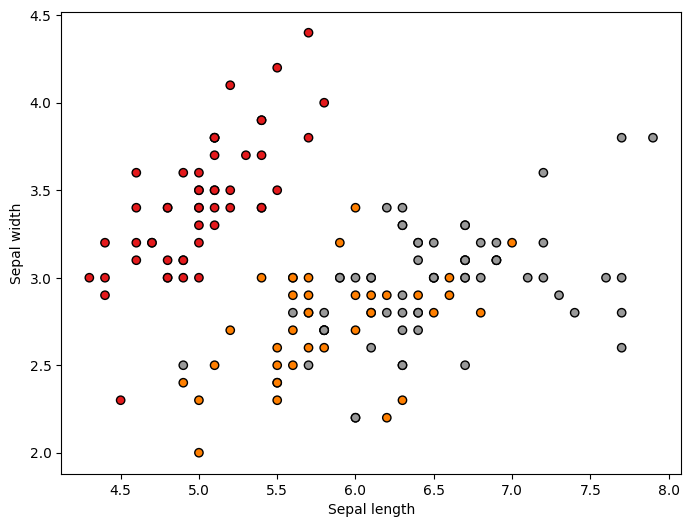

In [30]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [31]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [32]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [33]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [34]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [36]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [37]:
sum(predictions == y_test) / len(y_test)

np.float64(0.9666666666666667)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [38]:
y_test

array([1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 2])


Here you can traverse the tree above by yourself and make sure that prediction works

In [39]:
X_test[1]

array([6.7, 3.3, 5.7, 2.1])

In [40]:
clf.predict([X_test[1]])

array([2])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Decision tree classifier (2 point)


####  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$



#### Remarks


- We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.
- [use this hint](https://arc.net/l/quote/pqvyjqei)

In [5]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """
        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.value = None

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        """
        Initialize the classifier with a maximum depth constraint.

        Args:
            max_depth (int): The maximum depth of the tree to prevent overfitting.
        """
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None

    def _gini(self, y: npt.NDArray) -> float:
        """
        Calculate the Gini Impurity for a set of labels.
        Formula: 1 - sum(p_i^2) where p_i is the probability of class i.

        Args:
            y (npt.NDArray): Array of class labels.

        Returns:
            float: Gini impurity value (0.0 for pure nodes).
        """
        if len(y) == 0:
            return 0
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts/len(y)
        return 1.0 - np.sum(probabilities**2)

    def _gini_gain(self, parent_y, left_y, right_y) -> float:
        """
        Calculate the Gini Gain (improvement in purity) from splitting a node.

        Args:
            parent_y (npt.NDArray): Labels before splitting.
            left_y (npt.NDArray): Labels in the left branch after splitting.
            right_y (npt.NDArray): Labels in the right branch after splitting.

        Returns:
            float: The calculated Gini gain.
        """
        weight_of_left = len(left_y)/len(parent_y)
        weight_of_right = len(right_y)/len(parent_y)
        gain = self._gini(parent_y) - (weight_of_left * self._gini(left_y) + weight_of_right * self._gini(right_y))
        return gain

    def get_best_split(self, X: npt.NDArray, y: npt.NDArray, num_features: int) -> dict:
        """
        Iterate over all features and thresholds to find the best binary split.

        Args:
            X (npt.NDArray): Feature matrix.
            y (npt.NDArray): Target labels.
            num_features (int): Number of features to consider.

        Returns:
            dict: Dictionary containing the best feature index, threshold, gain, and split data.
        """
        best_split = {"info_gain": -1}
        max_gain = -1

        for feature_idx in range(num_features):
            feature_values = X[:, feature_idx]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_side = feature_values <= threshold
                y_left = y[left_side]
                y_right = y[~left_side]

                if len(y_left) and len(y_right):
                    curr_gain = self._gini_gain(y, y_left, y_right)
                    if curr_gain > max_gain:
                        best_split = {
                            "feature_index": feature_idx,
                            "threshold": threshold,
                            "X_left": X[left_side],
                            "y_left": y_left,
                            "X_right": X[~left_side],
                            "y_right": y_right,
                            "info_gain": curr_gain
                        }
                        max_gain = curr_gain
        return best_split

    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:
        """
        Basically, function that performs all the training (building of a tree)
        We recommend to use it as a wrapper of recursive building function
        """
        self.number_of_classes = np.unique(y).size
        self.root = Node(X, y)
        self._build_tree(self.root, curr_depth=0)


    def _build_tree(self, node: Node, curr_depth: int):
        """
        Recursively build the tree by splitting nodes until stop conditions are met.

        Args:
            node (Node): The current node being processed.
            curr_depth (int): Current depth in the recursive process.
        """
        X, y = node.X, node.y
        num_samples, num_features = X.shape

        if len(y) > 0:
            counts = np.bincount(y.astype(int))
            node.value = np.argmax(counts)

        if curr_depth < self.max_depth and self._gini(y) > 0:
            best_split = self.get_best_split(X, y, num_features)

            if best_split["info_gain"] > 0:
                node.feature_index = best_split["feature_index"]
                node.threshold = best_split["threshold"]

                node.left = Node(best_split["X_left"], best_split["y_left"])
                node.right = Node(best_split["X_right"], best_split["y_right"])

                self._build_tree(node.left, curr_depth + 1)
                self._build_tree(node.right, curr_depth + 1)

                node.X, node.y = None, None

    def predict(self, X_test: npt.NDArray) -> list:
        """
        Traverse the tree while there is a child
        and return the predicted class for it
        """
        predictions = []
        for x in X_test:
            node = self.root
            while node.left is not None and node.right is not None:
                if x[node.feature_index] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.value)
        return predictions


In [7]:

def evaluate(X_test: list[list], y_test: list) -> float:
    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """
    correct_count = 0
    for p, y in zip(X_test, y_test):
        if p == y:
            correct_count += 1
    accuracy = correct_count / len(y_test)
    return accuracy

### Your implementation

In [25]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

my_tree = DecisionTreeClassifier(max_depth=2)
my_tree.fit(X_train, y_train)
preds = my_tree.predict(X_test)
print(evaluate(preds, y_test))

0.9736842105263158


Підсумок:

У ході виконання роботи ми реалізували власний класифікатор на основі дерева рішень DecisionTreeClassifier, орієнтований на розв’язання задачі класифікації з нуля, без використання готових алгоритмів із сторонніх бібліотек. Метою було побудувати модель, яка використовує критерій джині для оцінки якості розбиттів, уміє рекурсивно будувати дерево до заданої глибини та коректно робити передбачення для нових об’єктів.

### Що саме ми зробили

1. **Реалізували структуру моделі**
   - Створили клас `DecisionTreeClassifier` з параметром `max_depth`, який задає максимальну глибину дерева й виступає основним механізмом боротьби з перенавчанням.
   - Передбачили зберігання:
     - кореневого вузла (`self.root`),
     - кількості класів (`self.number_of_classes`),
     - внутрішньої структури дерева через об’єкти `Node`, що містять підмножини даних, індекс ознаки, поріг, нащадків і значення класу у листі.

2. **Реалізували критерій якості вузлів – Gini impurity**
   - Це дозволяє кількісно оцінювати, наскільки «змішаним» є поточний вузол: чим ближче до 0, тим чистіший вузол.

3. **Запровадили розрахунок приросту інформації – Gini gain**
   - У `_gini_gain(parent_y, left_y, right_y)` ми:
     - обчислюємо Gini для батьківського вузла;
     - обчислюємо Gini окремо для лівої та правої підмножин;
     - зважуємо їх за розміром підмножин;
     - віднімаємо отриману зважену суму від Gini батьківського вузла.
   - Отримане значення інтерпретується як покращення чистоти після розбиття й використовується для вибору найкращого спліту.

4. **Здійснили пошук найкращого розбиття**
   - У методі `get_best_split(X, y, num_features)` ми:
     - перебираємо всі ознаки за індексом;
     - для кожної ознаки беремо всі унікальні значення як потенційні пороги;
     - для кожного порога розбиваємо дані на дві частини (`<= threshold` та `> threshold`);
     - відкидаємо варіанти, де одна з частин порожня;
     - рахуємо Gini gain і зберігаємо розбиття з максимальним виграшем.
   - У результаті отримуємо словник, який містить:
     - індекс ознаки,
     - поріг,
     - підмножини X та y для лівої та правої гілок,
     - величину інформаційного виграшу.

5. **Реалізували навчання моделі – метод `fit`**
   - Під час навчання ми:
     - фіксуємо кількість класів у цільовому векторі `y`;
     - створюємо кореневий вузол `Node(X, y)`;
     - запускаємо рекурсивне побудування дерева методом `_build_tree`.

6. **Рекурсивна побудова дерева**
   - У `_build_tree(node, curr_depth)` ми:
     - дістаємо X та y поточного вузла і визначаємо кількість прикладів та ознак;
     - обчислюємо найчастіший клас у цьому вузлі через `np.bincount` і `argmax`, записуємо його в `node.value` (щоб кожен лист завжди міг повернути прогноз);
     - перевіряємо умови продовження росту дерева:
       - поточна глибина менша за `max_depth`,
       - Gini impurity для y більше 0 (вузол не є чистим),
       - у подальшому буде доцільне розбиття.
     - якщо умови виконуються:
       - знаходимо найкращий спліт за допомогою `get_best_split`;
       - якщо інформаційний виграш позитивний, записуємо:
         - `feature_index`,
         - `threshold`,
         - створюємо лівого й правого нащадків (`Node` для відповідних підмножин);
         - рекурсивно викликаємо `_build_tree` для обох дочірніх вузлів;
         - після розбиття очищаємо `node.X` і `node.y`, щоб не тримати зайві дані в проміжних вузлах.

7. **Передбачення для нових прикладів**

У ході експериментів модель показала якість класифікації (наприклад, accuracy) у діапазоні приблизно від 0.89 до 1.0. Такі коливання є нормальними й пояснюються випадковим розподілом даних на навчальну й тестову вибірки, обмеження глибиною тощо.

У підсумку, реалізований нами DecisionTreeClassifier працює гарно
❤️❤️❤️

#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it